# Get Concretemodel Need Data

In [1]:
import pandas as pd
import cobra
import sys
sys.path.append(r'./script')
from ETGEMs_function import *

model_file='./data/iCW773_retgems.json'
model_name = model_file.split('/')[-1].split('_irr')[0]
reaction_g0_file = "./analysis/g0_compare/reaction_g0_combine.csv"
metabolites_lnC_file = './data/metabolites_lnC_cg1.txt'
reaction_kcat_MW_combine = "./analysis/kcat_compare/combine_kcat_mw.csv"
reaction_kcat_MW_autopacmen = "./analysis/kcat_compare/autopacmen_kcat_mw.csv"
reaction_kcat_MW_dlkcat = "./analysis/kcat_compare/dlkcat_kcat_mw.csv"
reaction_kcat_MW_turnup = "./analysis/kcat_compare/turnup_kcat_mw.csv"
reaction_kcat_MW_unikp = "./analysis/kcat_compare/unikp_kcat_mw.csv"


Concretemodel_Need_Data_combine = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_combine)
Concretemodel_Need_Data_autopacmen = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_autopacmen)
Concretemodel_Need_Data_dlkcat = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_dlkcat)
Concretemodel_Need_Data_turnup = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_turnup)
Concretemodel_Need_Data_unikp = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_unikp)

# Get ETGEM

In [2]:
import pandas as pd
import numpy as np

Biomass_list=pd.DataFrame()
obj_name='CG_biomass_cgl_ATCC13032'#CG_biomass_cgl_ATCC13032
obj_target='maximize'
E_total=0.129 #eaual to e_pool （0.228）* saturation（0.5）0.227
substrate_name='EX_glc_e_reverse'
substrate_value = 4.67
K_value=2765
B_value=0

etm_combine = EcoETM(Concretemodel_Need_Data_combine,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_autopacmen = EcoETM(Concretemodel_Need_Data_autopacmen,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_dlkcat = EcoETM(Concretemodel_Need_Data_dlkcat,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_turnup = EcoETM(Concretemodel_Need_Data_turnup,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_unikp = EcoETM(Concretemodel_Need_Data_unikp,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)

# Model solve

In [3]:
opt_combine = Model_Solve(etm_combine, "cplex_direct")
opt_autopacmen = Model_Solve(etm_autopacmen, "cplex_direct")
opt_dlkcat = Model_Solve(etm_dlkcat, "cplex_direct")
opt_turnup = Model_Solve(etm_turnup, "cplex_direct")
opt_unikp = Model_Solve(etm_unikp, "cplex_direct")

print("combine", " : ", opt_combine.obj())
print("autopacmen", " : ", opt_autopacmen.obj())
print("dlkcat", " : ", opt_dlkcat.obj())
print("turnup", " : ", opt_turnup.obj())
print("unikp", " : ", opt_unikp.obj())

combine  :  0.08668398388858364
autopacmen  :  0.08753413498569641
dlkcat  :  0.21505413336913817
turnup  :  0.5113059002070838
unikp  :  0.2518424761752578


# Parameter optimization

In [4]:
import sys
sys.path.append(r'./script')
from ETGEMs_function import *
# from ECMpy_function import *

obj_name='CG_biomass_cgl_ATCC13032'#CG_biomass_cgl_ATCC13032
obj_target='maximize'
E_total=0.129 #eaual to e_pool （0.228）* saturation（0.5）0.227
substrate_name='EX_glc_e_reverse'
substrate_value = 4.67
K_value=2765
B_value=0
expected_value = 0.46
rounds_num = 50
kcat_max_json = "./data/EC_kcat_max.json"

In [5]:
# 修正融合后的kcat
optimize_enzyme_parameters(model_file, Concretemodel_Need_Data_combine, obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value, expected_value, rounds_num, kcat_max_json)

------ Start checking enzyme parameters ------
ASAD_reverse  kcat ->  330.0
rounds: 1
changed_reaction_list: ['ASAD_reverse']
solution: 0.13174591271330957
-------------------------------------------
PPNDH  kcat ->  1932.0
rounds: 2
changed_reaction_list: ['ASAD_reverse', 'PPNDH']
solution: 0.19437617380187597
-------------------------------------------
ASPK  kcat ->  245.0
rounds: 3
changed_reaction_list: ['ASAD_reverse', 'PPNDH', 'ASPK']
solution: 0.28442410373614185
-------------------------------------------
GHMT2r  kcat ->  999.0
rounds: 4
changed_reaction_list: ['ASAD_reverse', 'PPNDH', 'ASPK', 'GHMT2r']
solution: 0.4549897654550754
-------------------------------------------
ATPS4rpp  kcat ->  390.0
rounds: 5
changed_reaction_list: ['ASAD_reverse', 'PPNDH', 'ASPK', 'GHMT2r', 'ATPS4rpp']
solution: 0.5096777423489419
-------------------------------------------


In [6]:
# Modify the kcat of autoPACMEN.

optimize_enzyme_parameters(model_file, Concretemodel_Need_Data_autopacmen, obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value, expected_value, rounds_num, kcat_max_json)

------ Start checking enzyme parameters ------
ASAD_reverse  kcat ->  330.0
rounds: 1
changed_reaction_list: ['ASAD_reverse']
solution: 0.13372147839327475
-------------------------------------------
PPNDH  kcat ->  1932.0
rounds: 2
changed_reaction_list: ['ASAD_reverse', 'PPNDH']
solution: 0.19870358824272472
-------------------------------------------
ASPK  kcat ->  245.0
rounds: 3
changed_reaction_list: ['ASAD_reverse', 'PPNDH', 'ASPK']
solution: 0.2934331918204766
-------------------------------------------
GHMT2r  kcat ->  999.0
rounds: 4
changed_reaction_list: ['ASAD_reverse', 'PPNDH', 'ASPK', 'GHMT2r']
solution: 0.4707957707065973
-------------------------------------------


In [7]:
# Modify the kcat of DLKcat.

optimize_enzyme_parameters(model_file, Concretemodel_Need_Data_dlkcat, obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value, expected_value, rounds_num, kcat_max_json)

------ Start checking enzyme parameters ------
HSDy_reverse  kcat ->  70.1
rounds: 1
changed_reaction_list: ['HSDy_reverse']
solution: 0.2835649834303266
-------------------------------------------
IPPS  kcat ->  450.0
rounds: 2
changed_reaction_list: ['HSDy_reverse', 'IPPS']
solution: 0.35329413520144126
-------------------------------------------
ASAD_reverse  kcat ->  330.0
rounds: 3
changed_reaction_list: ['HSDy_reverse', 'IPPS', 'ASAD_reverse']
solution: 0.4299412909997791
-------------------------------------------
ICDHyr  kcat ->  999.0
rounds: 4
changed_reaction_list: ['HSDy_reverse', 'IPPS', 'ASAD_reverse', 'ICDHyr']
solution: 0.51923332250071
-------------------------------------------


In [8]:
# Modify the kcat of TurNup.

optimize_enzyme_parameters(model_file, Concretemodel_Need_Data_turnup, obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value, expected_value, rounds_num, kcat_max_json)

------ Start checking enzyme parameters ------


In [9]:
# Modify the kcat of UniKP.

optimize_enzyme_parameters(model_file, Concretemodel_Need_Data_unikp, obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value, expected_value, rounds_num, kcat_max_json)

------ Start checking enzyme parameters ------
GAPD_num1  kcat ->  999.0
rounds: 1
changed_reaction_list: ['GAPD_num1']
solution: 0.29349696856034585
-------------------------------------------
G6PDH2r  kcat ->  8000.0
rounds: 2
changed_reaction_list: ['GAPD_num1', 'G6PDH2r']
solution: 0.33911484760405575
-------------------------------------------
GLUSy  kcat ->  41.9
rounds: 3
changed_reaction_list: ['GAPD_num1', 'G6PDH2r', 'GLUSy']
solution: 0.35764856308603504
-------------------------------------------
GND  kcat ->  325.0
rounds: 4
changed_reaction_list: ['GAPD_num1', 'G6PDH2r', 'GLUSy', 'GND']
solution: 0.37981122877266393
-------------------------------------------
TKT2  kcat ->  999.0
rounds: 5
changed_reaction_list: ['GAPD_num1', 'G6PDH2r', 'GLUSy', 'GND', 'TKT2']
solution: 0.39177529514951903
-------------------------------------------
AKGDH  kcat ->  999.0
rounds: 6
changed_reaction_list: ['GAPD_num1', 'G6PDH2r', 'GLUSy', 'GND', 'TKT2', 'AKGDH']
solution: 0.4018874174292236


In [10]:
Concretemodel_Need_Data_combine["reaction_kcat_MW"].to_csv("./analysis/kcat_compare/combine_kcat_mw_correct.csv")
Concretemodel_Need_Data_autopacmen["reaction_kcat_MW"].to_csv("./analysis/kcat_compare/autopacmen_kcat_mw_correct.csv")
Concretemodel_Need_Data_dlkcat["reaction_kcat_MW"].to_csv("./analysis/kcat_compare/dlkcat_kcat_mw_correct.csv")
Concretemodel_Need_Data_turnup["reaction_kcat_MW"].to_csv("./analysis/kcat_compare/turnup_kcat_mw_correct.csv")
Concretemodel_Need_Data_unikp["reaction_kcat_MW"].to_csv("./analysis/kcat_compare/unikp_kcat_mw_correct.csv")

# Comparison of C13 flux data

In [11]:
# In Silico Genome-Scale Reconstruction and Validation of the Corynebacterium glutamicum Metabolic Network
C13_flux = {}
C13_flux["GLCptspp"] = 1.0
C13_flux["PGI"] = 0.108
C13_flux["G6PDH2r"] = 0.885
C13_flux["PGL"] = 0.885
C13_flux["GND"] = 0.885
C13_flux["TKT1"] = 0.291
C13_flux["TALA"] = 0.270
C13_flux["TKT2"] = 0.291
C13_flux["PFK"] = 0.662
C13_flux["TPI"] = 0.662
C13_flux["GAPD_num1"] = 1.534
C13_flux["PGK"] = 1.534
C13_flux["PGM_num1"] = 1.534
C13_flux["ENO"] = 1.534
C13_flux["PPC"] = 0.203
C13_flux["PDH"] = 1.088
C13_flux["CS_num1"] = 0.75
C13_flux["ACONTa"] = 0.75
C13_flux["ACONTb"] = 0.75
C13_flux["ICDHyr"] = 0.75
C13_flux["AKGDH"] = 0.655
C13_flux["SUCOAS"] = 0.655
C13_flux["SUCDi"] = 0.655
C13_flux["FUM"] = 0.655
C13_flux["MDH"] = 0.655

In [12]:
c13_df = pd.DataFrame(list(C13_flux.items()), columns=['reaction', 'experiment'])
c13_df = c13_df.set_index("reaction")

In [13]:
reaction_kcat_MW_combine = "./analysis/kcat_compare/combine_kcat_mw_correct.csv"
reaction_kcat_MW_autopacmen = "./analysis/kcat_compare/autopacmen_kcat_mw_correct.csv"
reaction_kcat_MW_dlkcat = "./analysis/kcat_compare/dlkcat_kcat_mw_correct.csv"
reaction_kcat_MW_turnup = "./analysis/kcat_compare/turnup_kcat_mw_correct.csv"
reaction_kcat_MW_unikp = "./analysis/kcat_compare/unikp_kcat_mw_correct.csv"

Concretemodel_Need_Data_combine = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_combine)
Concretemodel_Need_Data_autopacmen = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_autopacmen)
Concretemodel_Need_Data_dlkcat = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_dlkcat)
Concretemodel_Need_Data_turnup = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_turnup)
Concretemodel_Need_Data_unikp = Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_unikp)

etm_combine = EcoETM(Concretemodel_Need_Data_combine,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_autopacmen = EcoETM(Concretemodel_Need_Data_autopacmen,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_dlkcat = EcoETM(Concretemodel_Need_Data_dlkcat,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_turnup = EcoETM(Concretemodel_Need_Data_turnup,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
etm_unikp = EcoETM(Concretemodel_Need_Data_unikp,obj_name,obj_target,substrate_name,substrate_value,E_total,K_value,B_value)
opt_combine = Model_Solve(etm_combine, "cplex_direct")
opt_autopacmen = Model_Solve(etm_autopacmen, "cplex_direct")
opt_dlkcat = Model_Solve(etm_dlkcat, "cplex_direct")
opt_turnup = Model_Solve(etm_turnup, "cplex_direct")
opt_unikp = Model_Solve(etm_unikp, "cplex_direct")

In [14]:
methods = ["Combine", "AutoPACMEN", "DLKcat", "TurNuP", "UniKP"]
opt_dict = {
    "Combine": opt_combine,
    "AutoPACMEN": opt_autopacmen,
    "DLKcat": opt_dlkcat,
    "TurNuP": opt_turnup,
    "UniKP": opt_unikp,
}
model = cobra.io.load_json_model("./data/iCW773_retgems.json")
solution = model.optimize()
for index,row in c13_df.iterrows():
    for method in methods:
        opt_result = opt_dict[method]
        if "_num" in index:
            reaction_flux_result = 0
            for reaction in model.reactions:
                if index[:-1] in reaction.id:
                    reaction_flux_result += opt_result.reaction[reaction.id].value
        else:
            reaction_flux_result = opt_result.reaction[index].value
        c13_df.loc[index, method] = reaction_flux_result/opt_result.reaction["EX_glc_e_reverse"].value
    c13_df.loc[index, "iCW773"] = solution.fluxes[index]/solution.fluxes["EX_glc_e_reverse"]

c13_df.to_csv("./analysis/C13_compare_central.csv")
c13_df.head()

,experiment,Combine,AutoPACMEN,DLKcat,TurNuP,UniKP,iCW773
reaction,,,,,,,
GLCptspp,1.000,1.000000,0.995188,0.994693,0.994774,0.995105,0.994412
PGI,0.108,0.463898,0.712370,0.983117,0.000000,0.779402,0.804609
G6PDH2r,0.885,0.518791,0.272322,0.000000,2.256212,0.205027,0.177615
PGL,0.885,0.518791,0.272322,0.000000,2.256212,0.205027,0.177615
GND,0.885,0.518791,0.272322,0.000000,2.256212,0.205027,0.177615


In [15]:
c13_diff = c13_df.copy()
for index, row in c13_diff.iterrows():
    c13_diff.loc[index, "Combine"] = abs(row["Combine"] - row["experiment"])/row["experiment"]
    c13_diff.loc[index, "AutoPACMEN"] = abs(row["AutoPACMEN"] - row["experiment"])/row["experiment"]
    c13_diff.loc[index, "DLKcat"] = abs(row["DLKcat"] - row["experiment"])/row["experiment"]
    c13_diff.loc[index, "TurNuP"] = abs(row["TurNuP"] - row["experiment"])/row["experiment"]
    c13_diff.loc[index, "UniKP"] = abs(row["UniKP"] - row["experiment"])/row["experiment"]
    c13_diff.loc[index, "iCW773"] = abs(row["iCW773"] - row["experiment"])/row["experiment"]

c13_diff.head()

,experiment,Combine,AutoPACMEN,DLKcat,TurNuP,UniKP,iCW773
reaction,,,,,,,
GLCptspp,1.000,0.000000,0.004812,0.005307,0.005226,0.004895,0.005588
PGI,0.108,3.295356,5.596023,8.102935,1.000000,6.216687,6.450086
G6PDH2r,0.885,0.413795,0.692292,1.000000,1.549392,0.768331,0.799305
PGL,0.885,0.413795,0.692292,1.000000,1.549392,0.768331,0.799305
GND,0.885,0.413795,0.692292,1.000000,1.549392,0.768331,0.799305


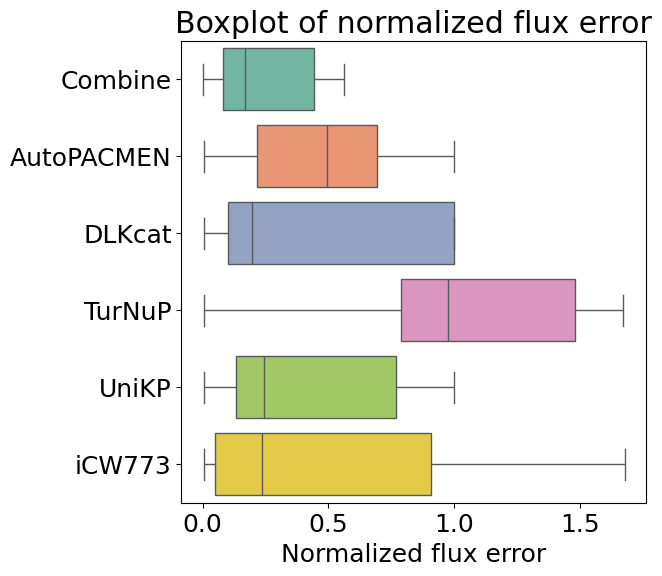

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
y_lab_len = len(c13_diff.columns)-1

c13_diff = c13_diff.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(6,y_lab_len))
sns.boxplot(data=c13_diff.drop(c13_diff.columns[0], axis=1), orient="h", palette="Set2", showfliers=False)
plt.title("Boxplot of normalized flux error")
plt.xlabel("Normalized flux error")
plt.savefig("./analysis/figure/all_source_boxplot_kcat_del_fill.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Pearson
import numpy as np
from scipy.stats import pearsonr

correlations = {}
for column in c13_df.columns:
    if column != 'experiment':
        correlation, _ = pearsonr(c13_df['experiment'], c13_df[column])
        correlations[column] = correlation
for column, correlation in correlations.items():
    print(f"Pearson correlation coefficient of '{column}': {correlation}")

Pearson correlation coefficient of 'Combine': 0.9192460208270321
Pearson correlation coefficient of 'AutoPACMEN': 0.8403997274680461
Pearson correlation coefficient of 'DLKcat': 0.7371174373906626
Pearson correlation coefficient of 'TurNuP': 0.18193494307808594
Pearson correlation coefficient of 'UniKP': 0.6788753154105438
Pearson correlation coefficient of 'iCW773': 0.23191897503246073


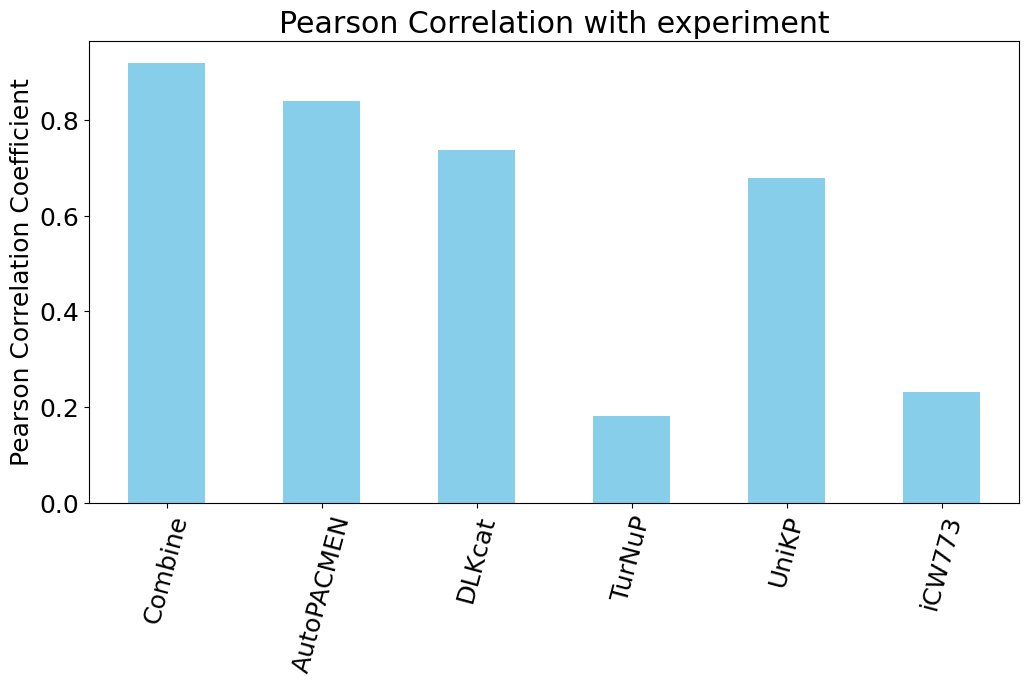

In [18]:
correlation_matrix = c13_df.corr()

columns_to_plot = ['experiment','Combine','AutoPACMEN','DLKcat','TurNuP','UniKP','iCW773']

correlation_with_baseline = c13_df[columns_to_plot].corr()['experiment']

correlation_list = correlation_with_baseline.drop('experiment').tolist()

plt.figure(figsize=(12, 6))
correlation_with_baseline.drop('experiment').plot(kind='bar', color='skyblue')
plt.title("Pearson Correlation with experiment")
plt.ylabel("Pearson Correlation Coefficient")
#plt.xlabel("Columns")
plt.xticks(rotation=75)
plt.savefig("./analysis/figure/correlation_with_experiment_13C_value.png", dpi=300, bbox_inches='tight')
plt.show()